In [1]:
from IPython.core.display import display, HTML

display(HTML("""
<style>
.container {
    width: 100% !important;
}
</style>
"""))

/tmp/ipykernel_402893/1854687832.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict
%matplotlib inline

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["TeX Gyre Termes", "Nimbus Roman", "Liberation Serif"]
plt.rcParams["font.style"] = "normal"
plt.rcParams["font.weight"] = "normal"


In [3]:
def get_feature_type(family):
    f = family.lower()
    if f.startswith("tfidf"):
        return "tfidf"
    elif f.startswith("fasttext"):
        return "fasttext"
    elif f.startswith("wfe"):
        return "wfe"
    elif f.startswith("wefe"):
        return "wefe"
    elif f.startswith("fe"):
        return "fe"
    elif f.startswith("we"):
        return "we"
    else:
        return "other"  # just in case

# FEATURES = ["fasttext", "we", "wfe", "wefe", "fe"]
FEATURES = ["fasttext", "we", "wefe", "fe"]
latex_labels = {
    "fasttext": r"$\mathcal{R}_{\mathrm{FT}}$",
    "we": r"$\mathcal{R}_{\mathrm{S}}$",
    "wefe": r"$\mathcal{R}_{\mathrm{H}}$",
    "wfe": r"$\mathcal{R}_{\mathrm{D}}$",
    "fe": r"$\mathcal{R}_{\mathrm{LLM}}$"
}

In [4]:
SAVE_FOLDER = "./generated_figures"
os.makedirs(SAVE_FOLDER, exist_ok=True)

In [5]:
jsd = pd.read_csv("./generated/jetson/sentiment/single/all_lang.csv")
jsd = jsd[jsd.FeatureFamily!='tfidf']
jsd['FeatureType'] = jsd['FeatureFamily'].apply(get_feature_type)
jsd['energy_per_sample'] = jsd['energy_per_sample']*3.6e6 # Joule
jsd['time_per_sample'] = jsd['time_per_sample']*1000 #  ms
jsd['EDP'] = jsd['time_per_sample'] * jsd['energy_per_sample'] # Joule ms
jsd['FeatureType'].value_counts()

FeatureType
we          2400
wefe        2400
wfe          960
fe           960
fasttext     400
Name: count, dtype: int64

In [6]:
jcd = pd.read_csv("./generated/jetson/clustering/all_lang.csv")
jcd  = jcd[jcd.FeatureFamily != 'tfidf']
jcd['FeatureType'] = jcd['FeatureFamily'].apply(get_feature_type)
jcd['energy_per_sample'] = jcd['energy_per_sample']*3.6e6
jcd['time_per_sample'] = jcd['time_per_sample']*1000 #  ms
jcd['EDP'] = jcd['time_per_sample'] * jcd['energy_per_sample']
jcd['FeatureType'].value_counts()

FeatureType
we          300
wefe        300
wfe         120
fe          120
fasttext     50
Name: count, dtype: int64

In [7]:
lsd = pd.read_csv("./generated/laptop/sentiment/single/all_lang.csv")
lsd = lsd[lsd.FeatureFamily!='tfidf']
lsd['FeatureType'] = lsd['FeatureFamily'].apply(get_feature_type)
lsd['energy_per_sample'] = lsd['energy_per_sample']*3.6e6
lsd['time_per_sample'] = lsd['time_per_sample']*1000 #  ms
lsd['EDP'] = lsd['time_per_sample'] * lsd['energy_per_sample']
lsd['FeatureType'].value_counts()

FeatureType
we          2400
wefe        2400
wfe          960
fe           960
fasttext     400
Name: count, dtype: int64

In [8]:
lcd = pd.read_csv("./generated/laptop/clustering/all_lang.csv")
lcd= lcd[lcd.FeatureFamily != 'tfidf']
lcd['FeatureType'] = lcd['FeatureFamily'].apply(get_feature_type)
lcd['energy_per_sample'] = lcd['energy_per_sample']*3.6e6
lcd['time_per_sample'] = lcd['time_per_sample']*1000 #  ms
lcd['EDP'] = lcd['time_per_sample'] * lcd['energy_per_sample']
lcd['FeatureType'].value_counts()

FeatureType
we          300
wefe        300
wfe         120
fe          120
fasttext     50
Name: count, dtype: int64

In [9]:
lsd.columns

Index(['FeatureFamily', 'FeatureVariant', 'Dataset', 'N_class', 'Model',
       'AccuracyTrain', 'WeightedF1Train', 'AccuracyTest', 'WeightedF1Test',
       'TrainingTime', 'NumParams', 'NumEpochs', 'data_pts', 'time_sec',
       'energy_kwh', 'throughput', 'time_per_sample', 'energy_per_sample',
       'FeatureType', 'EDP'],
      dtype='object')

In [10]:
lcd.columns

Index(['FeatureFamily', 'FeatureVariant', 'Dataset', 'Model', 'TrainingTime',
       'train_silhouette_score', 'train_calinski_harabasz_score',
       'train_davies_bouldin_score', 'train_adjusted_rand_score',
       'train_normalized_mutual_info_score', 'train_v_measure_score',
       'train_homogeneity_score', 'train_completeness_score', 'train_f1_score',
       'data_pts', 'time_sec', 'energy_kwh', 'throughput', 'time_per_sample',
       'energy_per_sample', 'FeatureType', 'EDP'],
      dtype='object')

# Throughput -- laptop

/tmp/ipykernel_402893/871012232.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


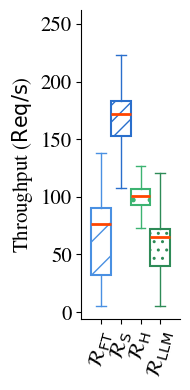

In [11]:
import matplotlib.pyplot as plt
from collections import defaultdict
import os

FONTSIZE = 15
CLS_TARGET = "throughput"

data = defaultdict(list)
labels = []

# Collect data from both sources and merge
for source in [lsd, lcd]:
    for feat in FEATURES:
        dt = source[source["FeatureType"] == feat][CLS_TARGET]
        data[feat].extend(dt)

labels = [latex_labels[t] for t in data.keys()]
data = list(data.values())

# Colors and hatches per feature
feature_colors = ['#4A90E2', '#2A6FCC', '#3CB371', '#2E8B57', '#1E5F3C', '#9B59B6']
feature_hatches = ['/', '//', '.', '..', '...', 'xx']

BOX_WIDTH = 0.02
median_color = '#FF4500'
INTRA_GAP = 0.00

# --- only one group now (merged) ---
group_sizes = [len(FEATURES)]

positions = []
startpos = 0
group_boundaries = []

for group_size in group_sizes:
    group_start = startpos
    for _ in range(group_size):
        positions.append(startpos)
        startpos += BOX_WIDTH + INTRA_GAP
    group_end = startpos - INTRA_GAP
    group_boundaries.append((group_start, group_end))

fig, ax = plt.subplots(figsize=(2, 4))

# Plot boxes
for i, pos in enumerate(positions):
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[pos],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False
    )

    feature_idx = i % len(FEATURES)
    color = feature_colors[feature_idx]
    hatch = feature_hatches[feature_idx]

    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatch, edgecolor=color, linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=color, linewidth=1)
    for cap in box['caps']:
        cap.set(color=color, linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

# X-ticks and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=75, fontsize=FONTSIZE)
ax.set_ylabel(r"Throughput ($\mathrm{Req}/\mathrm{s}$)", fontsize=FONTSIZE)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust ylim to give space for labels
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.12)

# Group label (since merged, just one)
mid = (group_boundaries[0][0] + group_boundaries[0][1]) / 2
# ax.text(mid, 1.02, "", ha='center', va='bottom',
#         fontsize=FONTSIZE, transform=ax.get_xaxis_transform())

# X-limits
margin = 0.02
ax.set_xlim(positions[0] - margin, positions[-1] + margin)

plt.tight_layout()

plt.show()


# Energy/sample -- laptop

/tmp/ipykernel_402893/1627037750.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


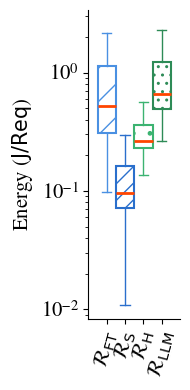

In [12]:
import matplotlib.pyplot as plt
from collections import defaultdict
import os

FONTSIZE = 15
CLS_TARGET = "energy_per_sample"

data = defaultdict(list)
labels = []

# Collect data from both sources and merge
for source in [lsd, lcd]:
    for feat in FEATURES:
        dt = source[source["FeatureType"] == feat][CLS_TARGET]
        data[feat].extend(dt)

labels = [latex_labels[t] for t in data.keys()]
data = list(data.values())

# Colors and hatches per feature
feature_colors = ['#4A90E2', '#2A6FCC', '#3CB371', '#2E8B57', '#1E5F3C', '#9B59B6']
feature_hatches = ['/', '//', '.', '..', '...', 'xx']

BOX_WIDTH = 0.02
median_color = '#FF4500'
INTRA_GAP = 0.00

# --- only one group now (merged) ---
group_sizes = [len(FEATURES)]

positions = []
startpos = 0
group_boundaries = []

for group_size in group_sizes:
    group_start = startpos
    for _ in range(group_size):
        positions.append(startpos)
        startpos += BOX_WIDTH + INTRA_GAP
    group_end = startpos - INTRA_GAP
    group_boundaries.append((group_start, group_end))

fig, ax = plt.subplots(figsize=(2, 4))

# Plot boxes
for i, pos in enumerate(positions):
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[pos],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False
    )

    feature_idx = i % len(FEATURES)
    color = feature_colors[feature_idx]
    hatch = feature_hatches[feature_idx]

    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatch, edgecolor=color, linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=color, linewidth=1)
    for cap in box['caps']:
        cap.set(color=color, linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)
ax.set_yscale('log')

# X-ticks and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=75, fontsize=FONTSIZE)
ax.set_ylabel(r"Energy ($\mathrm{J}/\mathrm{Req}$)", fontsize=FONTSIZE)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust ylim to give space for labels
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.12)

# Group label (since merged, just one)
mid = (group_boundaries[0][0] + group_boundaries[0][1]) / 2
# ax.text(mid, 1.02, "", ha='center', va='bottom',
#         fontsize=FONTSIZE, transform=ax.get_xaxis_transform())

# X-limits
margin = 0.02
ax.set_xlim(positions[0] - margin, positions[-1] + margin)

plt.tight_layout()

plt.show()


# Latency/sample -- laptop

/tmp/ipykernel_402893/3683772130.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


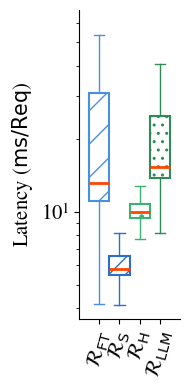

In [13]:
import matplotlib.pyplot as plt
from collections import defaultdict
import os

FONTSIZE = 15
CLS_TARGET = "time_per_sample"

data = defaultdict(list)
labels = []

# Collect data from both sources and merge
for source in [lsd, lcd]:
    for feat in FEATURES:
        dt = source[source["FeatureType"] == feat][CLS_TARGET]
        data[feat].extend(dt)

labels = [latex_labels[t] for t in data.keys()]
data = list(data.values())

# Colors and hatches per feature
feature_colors = ['#4A90E2', '#2A6FCC', '#3CB371', '#2E8B57', '#1E5F3C', '#9B59B6']
feature_hatches = ['/', '//', '.', '..', '...', 'xx']

BOX_WIDTH = 0.02
median_color = '#FF4500'
INTRA_GAP = 0.00

# --- only one group now (merged) ---
group_sizes = [len(FEATURES)]

positions = []
startpos = 0
group_boundaries = []

for group_size in group_sizes:
    group_start = startpos
    for _ in range(group_size):
        positions.append(startpos)
        startpos += BOX_WIDTH + INTRA_GAP
    group_end = startpos - INTRA_GAP
    group_boundaries.append((group_start, group_end))

fig, ax = plt.subplots(figsize=(2, 4))

# Plot boxes
for i, pos in enumerate(positions):
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[pos],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False
    )

    feature_idx = i % len(FEATURES)
    color = feature_colors[feature_idx]
    hatch = feature_hatches[feature_idx]

    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatch, edgecolor=color, linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=color, linewidth=1)
    for cap in box['caps']:
        cap.set(color=color, linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_yscale('log')

# X-ticks and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=75, fontsize=FONTSIZE)
ax.set_ylabel(r"Latency ($\mathrm{ms}/\mathrm{Req}$)", fontsize=FONTSIZE)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust ylim to give space for labels
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.12)

# Group label (since merged, just one)
mid = (group_boundaries[0][0] + group_boundaries[0][1]) / 2
# ax.text(mid, 1.02, "", ha='center', va='bottom',
#         fontsize=FONTSIZE, transform=ax.get_xaxis_transform())

# X-limits
margin = 0.02
ax.set_xlim(positions[0] - margin, positions[-1] + margin)

plt.tight_layout()

plt.show()


# EDP -- Laptop

/tmp/ipykernel_402893/3606081041.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


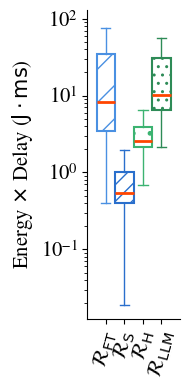

In [14]:
import matplotlib.pyplot as plt
from collections import defaultdict
import os

FONTSIZE = 15
CLS_TARGET = "EDP"

data = defaultdict(list)
labels = []

# Collect data from both sources and merge
for source in [lsd, lcd]:
    for feat in FEATURES:
        dt = source[source["FeatureType"] == feat][CLS_TARGET]
        data[feat].extend(dt)

labels = [latex_labels[t] for t in data.keys()]
data = list(data.values())

# Colors and hatches per feature
feature_colors = ['#4A90E2', '#2A6FCC', '#3CB371', '#2E8B57', '#1E5F3C', '#9B59B6']
feature_hatches = ['/', '//', '.', '..', '...', 'xx']

BOX_WIDTH = 0.02
median_color = '#FF4500'
INTRA_GAP = 0.00

# --- only one group now (merged) ---
group_sizes = [len(FEATURES)]

positions = []
startpos = 0
group_boundaries = []

for group_size in group_sizes:
    group_start = startpos
    for _ in range(group_size):
        positions.append(startpos)
        startpos += BOX_WIDTH + INTRA_GAP
    group_end = startpos - INTRA_GAP
    group_boundaries.append((group_start, group_end))

fig, ax = plt.subplots(figsize=(2, 4))

# Plot boxes
for i, pos in enumerate(positions):
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[pos],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False
    )

    feature_idx = i % len(FEATURES)
    color = feature_colors[feature_idx]
    hatch = feature_hatches[feature_idx]

    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatch, edgecolor=color, linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=color, linewidth=1)
    for cap in box['caps']:
        cap.set(color=color, linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)
ax.set_yscale('log')

# X-ticks and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=75, fontsize=FONTSIZE)
ax.set_ylabel(r"Energy $\times$ Delay ($\mathrm{J}\cdot\mathrm{ms}$)", fontsize=FONTSIZE)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust ylim to give space for labels
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.12)

# Group label (since merged, just one)
mid = (group_boundaries[0][0] + group_boundaries[0][1]) / 2
# ax.text(mid, 1.02, "", ha='center', va='bottom',
#         fontsize=FONTSIZE, transform=ax.get_xaxis_transform())

# X-limits
margin = 0.02
ax.set_xlim(positions[0] - margin, positions[-1] + margin)

plt.tight_layout()

plt.show()


# ALL MERGED -- LAPTOP

/tmp/ipykernel_402893/2449646855.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
/tmp/ipykernel_402893/2449646855.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
/tmp/ipykernel_402893/2449646855.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
/tmp/ipykernel_402893/2449646855.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


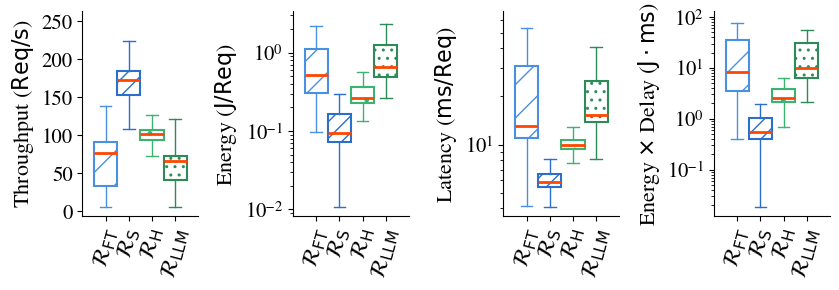

In [15]:
import matplotlib.pyplot as plt
from collections import defaultdict
import os

FONTSIZE = 16
BOX_WIDTH = 0.02
median_color = '#FF4500'
INTRA_GAP = 0.00

# Metrics to plot and their y-axis labels
metrics = [
    ("throughput", r"Throughput ($\mathrm{Req}/\mathrm{s}$)", False),
    ("energy_per_sample", r"Energy ($\mathrm{J}/\mathrm{Req}$)", True),
    ("time_per_sample", r"Latency ($\mathrm{ms}/\mathrm{Req}$)", True),
    ("EDP", r"Energy $\times$ Delay ($\mathrm{J}\cdot\mathrm{ms}$)", True)
]

# Colors and hatches per feature
feature_colors = ['#4A90E2', '#2A6FCC', '#3CB371', '#2E8B57', '#1E5F3C', '#9B59B6']
feature_hatches = ['/', '//', '.', '..', '...', 'xx']

fig, axes = plt.subplots(1, 4, figsize=(8.5, 3), sharex=True)

for ax, (CLS_TARGET, ylabel, logscale) in zip(axes, metrics):
    data = defaultdict(list)
    # Collect data from both sources and merge
    for source in [lsd, lcd]:
        for feat in FEATURES:
            dt = source[source["FeatureType"] == feat][CLS_TARGET]
            data[feat].extend(dt)

    labels = [latex_labels[t] for t in data.keys()]
    data_list = list(data.values())

    # Positions
    positions = []
    startpos = 0
    group_sizes = [len(FEATURES)]
    for group_size in group_sizes:
        for _ in range(group_size):
            positions.append(startpos)
            startpos += BOX_WIDTH + INTRA_GAP

    # Plot boxes
    for i, pos in enumerate(positions):
        arr = data_list[i]
        box = ax.boxplot(
            arr,
            positions=[pos],
            widths=BOX_WIDTH,
            patch_artist=True,
            showfliers=False
        )

        feature_idx = i % len(FEATURES)
        color = feature_colors[feature_idx]
        hatch = feature_hatches[feature_idx]

        for patch in box['boxes']:
            patch.set(facecolor='none', hatch=hatch, edgecolor=color, linewidth=1.5)
        for whisker in box['whiskers']:
            whisker.set(color=color, linewidth=1)
        for cap in box['caps']:
            cap.set(color=color, linewidth=1)
        for median in box['medians']:
            median.set(color=median_color, linewidth=2, zorder=5)

    if logscale:
        ax.set_yscale('log')

    # X-ticks and labels
    ax.set_xticks(positions)
    ax.set_xticklabels(labels, rotation=75, fontsize=FONTSIZE)
    ax.set_ylabel(ylabel, fontsize=FONTSIZE)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Adjust ylim
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax * 1.12)

    # X-limits
    margin = 0.02
    ax.set_xlim(positions[0] - margin, positions[-1] + margin)

plt.tight_layout()
# plt.savefig(SAVE_FOLDER + os.sep + "efficiency_boxplots_laptop.pdf",
#             format='pdf', bbox_inches='tight')
plt.show()


# ALL MERGED -- Jetson

/tmp/ipykernel_402893/4115417290.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
/tmp/ipykernel_402893/4115417290.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
/tmp/ipykernel_402893/4115417290.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
/tmp/ipykernel_402893/4115417290.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


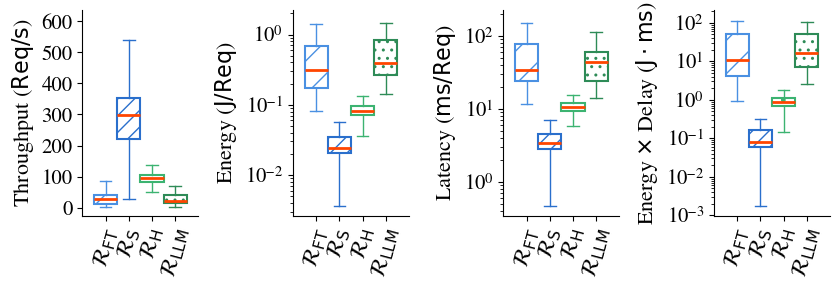

In [16]:
import matplotlib.pyplot as plt
from collections import defaultdict
import os

FONTSIZE = 16
BOX_WIDTH = 0.02
median_color = '#FF4500'
INTRA_GAP = 0.00

# Metrics to plot and their y-axis labels
metrics = [
    ("throughput", r"Throughput ($\mathrm{Req}/\mathrm{s}$)", False),
    ("energy_per_sample", r"Energy ($\mathrm{J}/\mathrm{Req}$)", True),
    ("time_per_sample", r"Latency ($\mathrm{ms}/\mathrm{Req}$)", True),
    ("EDP", r"Energy $\times$ Delay ($\mathrm{J}\cdot\mathrm{ms}$)", True)
]

# Colors and hatches per feature
feature_colors = ['#4A90E2', '#2A6FCC', '#3CB371', '#2E8B57', '#1E5F3C', '#9B59B6']
feature_hatches = ['/', '//', '.', '..', '...', 'xx']

fig, axes = plt.subplots(1, 4, figsize=(8.5, 3), sharex=True)

for ax, (CLS_TARGET, ylabel, logscale) in zip(axes, metrics):
    data = defaultdict(list)
    # Collect data from both sources and merge
    for source in [jsd, jcd]:
        for feat in FEATURES:
            dt = source[source["FeatureType"] == feat][CLS_TARGET]
            data[feat].extend(dt)

    labels = [latex_labels[t] for t in data.keys()]
    data_list = list(data.values())

    # Positions
    positions = []
    startpos = 0
    group_sizes = [len(FEATURES)]
    for group_size in group_sizes:
        for _ in range(group_size):
            positions.append(startpos)
            startpos += BOX_WIDTH + INTRA_GAP

    # Plot boxes
    for i, pos in enumerate(positions):
        arr = data_list[i]
        box = ax.boxplot(
            arr,
            positions=[pos],
            widths=BOX_WIDTH,
            patch_artist=True,
            showfliers=False
        )

        feature_idx = i % len(FEATURES)
        color = feature_colors[feature_idx]
        hatch = feature_hatches[feature_idx]

        for patch in box['boxes']:
            patch.set(facecolor='none', hatch=hatch, edgecolor=color, linewidth=1.5)
        for whisker in box['whiskers']:
            whisker.set(color=color, linewidth=1)
        for cap in box['caps']:
            cap.set(color=color, linewidth=1)
        for median in box['medians']:
            median.set(color=median_color, linewidth=2, zorder=5)

    if logscale:
        ax.set_yscale('log')

    # X-ticks and labels
    ax.set_xticks(positions)
    ax.set_xticklabels(labels, rotation=75, fontsize=FONTSIZE)
    ax.set_ylabel(ylabel, fontsize=FONTSIZE)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Adjust ylim
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax * 1.12)

    # X-limits
    margin = 0.02
    ax.set_xlim(positions[0] - margin, positions[-1] + margin)

plt.tight_layout()
# plt.savefig(SAVE_FOLDER + os.sep + "efficiency_boxplots_jetson.pdf",
#             format='pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_402893/1164544572.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
/tmp/ipykernel_402893/1164544572.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
/tmp/ipykernel_402893/1164544572.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
/tmp/ipykernel_402893/1164544572.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
/tmp/ipykernel_402893/1164544572.py:70: UserWarning: set_ticklabels() should only be used with a fixed n

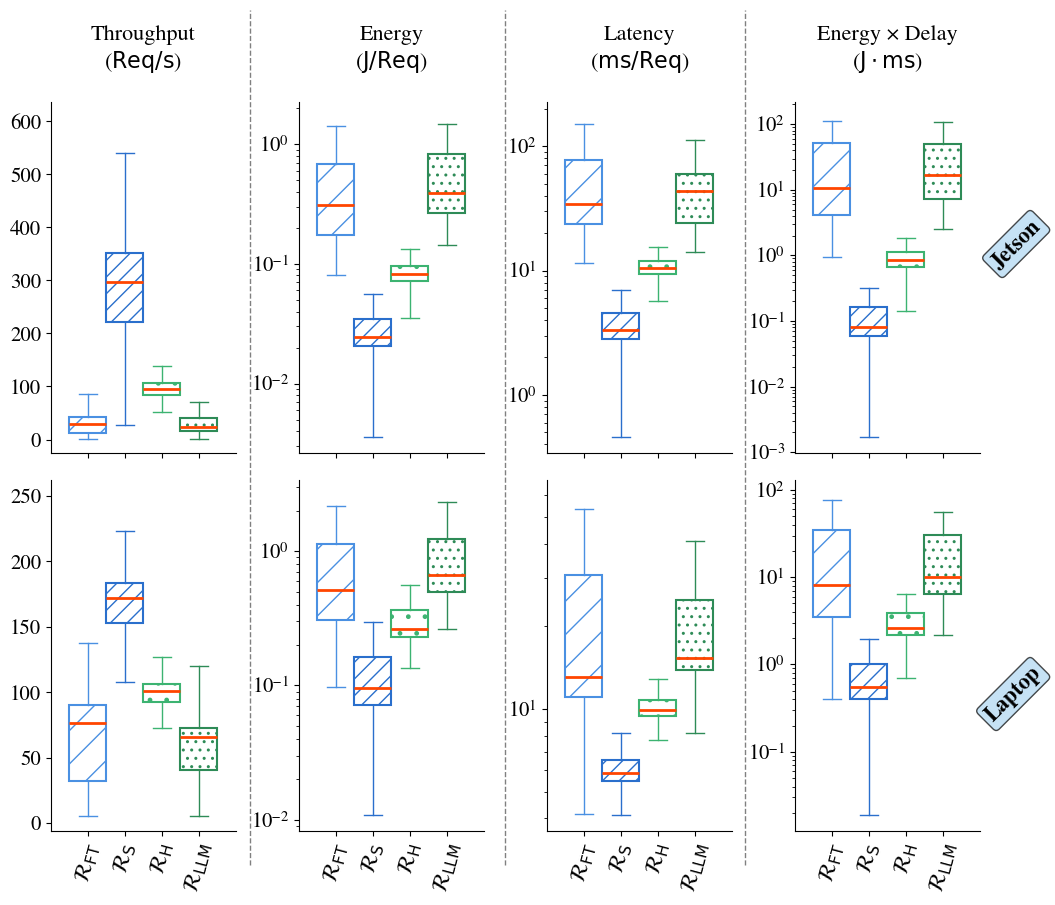

In [17]:
import matplotlib.pyplot as plt
from collections import defaultdict
import os

FONTSIZE = 16
BOX_WIDTH = 0.02
median_color = '#FF4500'
INTRA_GAP = 0.00
LABEL_BOX_COLOR = "#AED6F1"  # Light blue rectangle
LABEL_BOX_OPACITY = 0.7

metrics = [
    ("throughput", "Throughput\n($\\mathrm{Req}/\\mathrm{s}$)", False),
    ("energy_per_sample", "Energy\n($\\mathrm{J}/\\mathrm{Req}$)", True),
    ("time_per_sample", "Latency\n($\\mathrm{ms}/\\mathrm{Req}$)", True),
    ("EDP", "Energy × Delay\n($\\mathrm{J}\\cdot\\mathrm{ms}$)", True)
]

feature_colors = ['#4A90E2', '#2A6FCC', '#3CB371', '#2E8B57', '#1E5F3C', '#9B59B6']
feature_hatches = ['/', '//', '.', '..', '...', 'xx']

fig, axes = plt.subplots(2, 4, figsize=(10, 9), sharex=True)
fig.subplots_adjust(wspace=0.4, hspace=0.5)  # spacing between subplots

def plot_row(ax_row, sources):
    for ax, (CLS_TARGET, ylabel, logscale) in zip(ax_row, metrics):
        data = defaultdict(list)
        for source in sources:
            for feat in FEATURES:
                dt = source[source["FeatureType"] == feat][CLS_TARGET]
                data[feat].extend(dt)

        labels = [latex_labels[t] for t in data.keys()]
        data_list = list(data.values())

        positions = []
        startpos = 0
        for _ in range(len(FEATURES)):
            positions.append(startpos)
            startpos += BOX_WIDTH + INTRA_GAP

        for i, pos in enumerate(positions):
            arr = data_list[i]
            box = ax.boxplot(
                arr,
                positions=[pos],
                widths=BOX_WIDTH,
                patch_artist=True,
                showfliers=False
            )

            feature_idx = i % len(FEATURES)
            color = feature_colors[feature_idx]
            hatch = feature_hatches[feature_idx]

            for patch in box['boxes']:
                patch.set(facecolor='none', hatch=hatch, edgecolor=color, linewidth=1.5)
            for whisker in box['whiskers']:
                whisker.set(color=color, linewidth=1)
            for cap in box['caps']:
                cap.set(color=color, linewidth=1)
            for median in box['medians']:
                median.set(color=median_color, linewidth=2, zorder=5)

        if logscale:
            ax.set_yscale('log')

        ax.set_xticks(positions)
        ax.set_xticklabels(labels, rotation=75, fontsize=FONTSIZE)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ymin, ymax = ax.get_ylim()
        ax.set_ylim(ymin, ymax * 1.12)
        margin = 0.02
        ax.set_xlim(positions[0] - margin, positions[-1] + margin)

# Plot first row: Jetson
plot_row(axes[0], [jsd, jcd])
# Plot second row: Laptop
plot_row(axes[1], [lsd, lcd])

# Add metric names as column headers on top row
for col in range(4):
    axes[0, col].set_title(metrics[col][1], fontsize=FONTSIZE, pad=25)  # pad moves it above plots

# Add vertical dashed lines between columns
from matplotlib.lines import Line2D

# Example tunable coordinates
# You can adjust these numbers between 0 and 1 to move lines
x_fracs = [0.255, 0.51, 0.75]   # x positions between columns
y_bottom_frac = 0.05            # bottom of dashed line
y_top_frac = 1               # top of dashed line

for x0 in x_fracs:
    line = Line2D([x0, x0], [y_bottom_frac, y_top_frac], transform=fig.transFigure,
                  color='gray', linestyle='--', linewidth=1)
    fig.add_artist(line)
# Text for each row
row_texts_left = ["Jetson", "Laptop"]   # left side

# Adjust the y positions for each row (0 = bottom, 1 = top)
y_positions = [0.78, 0.28]  # approximate vertical center of each row

for i, y in enumerate(y_positions):
    # Left side text
    # fig.text(-0.01, y, row_texts_left[i], fontsize=FONTSIZE, va='center', ha='left', fontweight='bold', rotation=90)
    # Right side text
    fig.text(1.05, y-0.04, row_texts_left[i], fontsize=FONTSIZE, va='center', ha='right', fontweight='bold', rotation=45,bbox=dict(facecolor=LABEL_BOX_COLOR, alpha=LABEL_BOX_OPACITY, edgecolor='black', boxstyle='round,pad=0.2'))

plt.tight_layout()
plt.savefig(SAVE_FOLDER + os.sep + "efficiency_boxplots.pdf",
            format='pdf', bbox_inches='tight')
plt.show()


# PARETO FRONTIER -- LAPTOP

In [18]:
print(FEATURES)

['fasttext', 'we', 'wefe', 'fe']


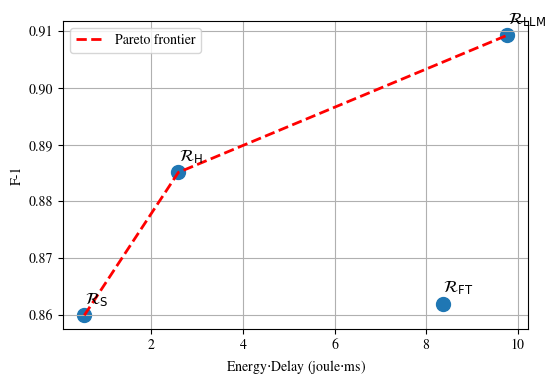

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- Dummy data from your dataframe ---
X = "EDP"
Y = "WeightedF1Test"
ylabel = "F-1"
xlabel = r"Energy$\cdot$Delay (joule$\cdot$ms)"
methods = FEATURES
x_vals = []
y_vals = []

for m in FEATURES:
    x_vals.append(lsd[(lsd.FeatureType == m) & (lsd.N_class == 2)][X].median())
    y_vals.append(lsd[(lsd.FeatureType == m) & (lsd.N_class == 2)][Y].median())

# Convert to numpy arrays
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

# --- Compute Pareto frontier ---
# Sort by x_vals ascending
sorted_idx = np.argsort(x_vals)
x_vals_sorted = x_vals[sorted_idx]
yy_sorted = y_vals[sorted_idx]

pareto_front = []
max_y = -np.inf
for lat, yy in zip(x_vals_sorted, yy_sorted):
    if yy > max_y:
        pareto_front.append((lat, yy))
        max_y = yy
pareto_front = np.array(pareto_front)

# --- Plot ---
plt.figure(figsize=(6,4))
plt.scatter(x_vals, y_vals, color='C0', s=100)

# Annotate points
for i, method in enumerate(methods):
    plt.text(x_vals[i]+0.01, y_vals[i]+0.002, latex_labels[method], fontsize=12)

# Draw Pareto frontier
plt.plot(pareto_front[:,0], pareto_front[:,1], 'r--', linewidth=2, label='Pareto frontier')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
# plt.title('Pareto Frontier Example')
plt.legend()
# plt.savefig(SAVE_FOLDER + os.sep + "pareto_binary.pdf",
#             format='pdf', bbox_inches='tight')
plt.grid(True)
plt.show()

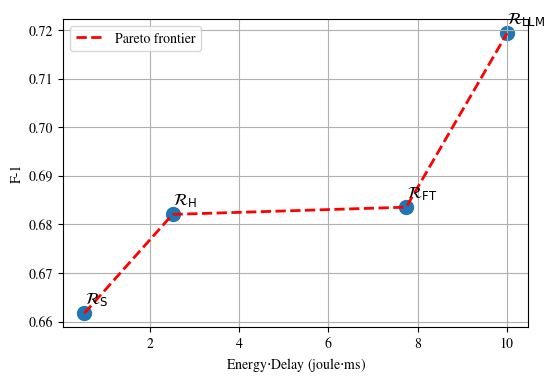

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# --- Dummy data from your dataframe ---
X = "EDP"
Y = "WeightedF1Test"
ylabel = "F-1"
xlabel = r"Energy$\cdot$Delay (joule$\cdot$ms)"
methods = FEATURES
x_vals = []
y_vals = []

for m in FEATURES:
    x_vals.append(lsd[(lsd.FeatureType == m) & (lsd.N_class == 3)][X].median())
    y_vals.append(lsd[(lsd.FeatureType == m) & (lsd.N_class == 3)][Y].median())

# Convert to numpy arrays
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

# --- Compute Pareto frontier ---
# Sort by x_vals ascending
sorted_idx = np.argsort(x_vals)
x_vals_sorted = x_vals[sorted_idx]
yy_sorted = y_vals[sorted_idx]

pareto_front = []
max_y = -np.inf
for lat, yy in zip(x_vals_sorted, yy_sorted):
    if yy > max_y:
        pareto_front.append((lat, yy))
        max_y = yy
pareto_front = np.array(pareto_front)

# --- Plot ---
plt.figure(figsize=(6,4))
plt.scatter(x_vals, y_vals, color='C0', s=100)

# Annotate points
for i, method in enumerate(methods):
    plt.text(x_vals[i]+0.01, y_vals[i]+0.002, latex_labels[method], fontsize=12)

# Draw Pareto frontier
plt.plot(pareto_front[:,0], pareto_front[:,1], 'r--', linewidth=2, label='Pareto frontier')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
# plt.title('Pareto Frontier Example')
plt.legend()
# plt.savefig(SAVE_FOLDER + os.sep + "pareto_ternary.pdf",
#             format='pdf', bbox_inches='tight')
plt.grid(True)
plt.show()

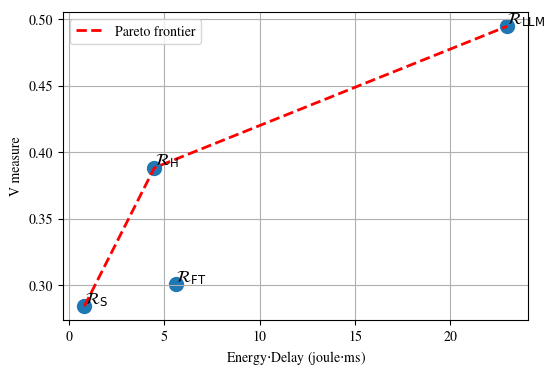

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# --- Dummy data from your dataframe ---
X = "EDP"
Y = "train_v_measure_score"
ylabel = "V measure"
xlabel = r"Energy$\cdot$Delay (joule$\cdot$ms)"
methods = FEATURES
x_vals = []
y_vals = []

for m in FEATURES:
    x_vals.append(lcd[(lcd.FeatureType == m) ][X].median())
    y_vals.append(lcd[(lcd.FeatureType == m) ][Y].median())

# Convert to numpy arrays
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

# --- Compute Pareto frontier ---
# Sort by x_vals ascending
sorted_idx = np.argsort(x_vals)
x_vals_sorted = x_vals[sorted_idx]
yy_sorted = y_vals[sorted_idx]

pareto_front = []
max_y = -np.inf
for lat, yy in zip(x_vals_sorted, yy_sorted):
    if yy > max_y:
        pareto_front.append((lat, yy))
        max_y = yy
pareto_front = np.array(pareto_front)

# --- Plot ---
plt.figure(figsize=(6,4))
plt.scatter(x_vals, y_vals, color='C0', s=100)

# Annotate points
for i, method in enumerate(methods):
    plt.text(x_vals[i]+0.01, y_vals[i]+0.002, latex_labels[method], fontsize=12)

# Draw Pareto frontier
plt.plot(pareto_front[:,0], pareto_front[:,1], 'r--', linewidth=2, label='Pareto frontier')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
# plt.title('Pareto Frontier Example')
plt.legend()
# plt.savefig(SAVE_FOLDER + os.sep + "pareto_ternary.pdf",
#             format='pdf', bbox_inches='tight')
plt.grid(True)
plt.show()

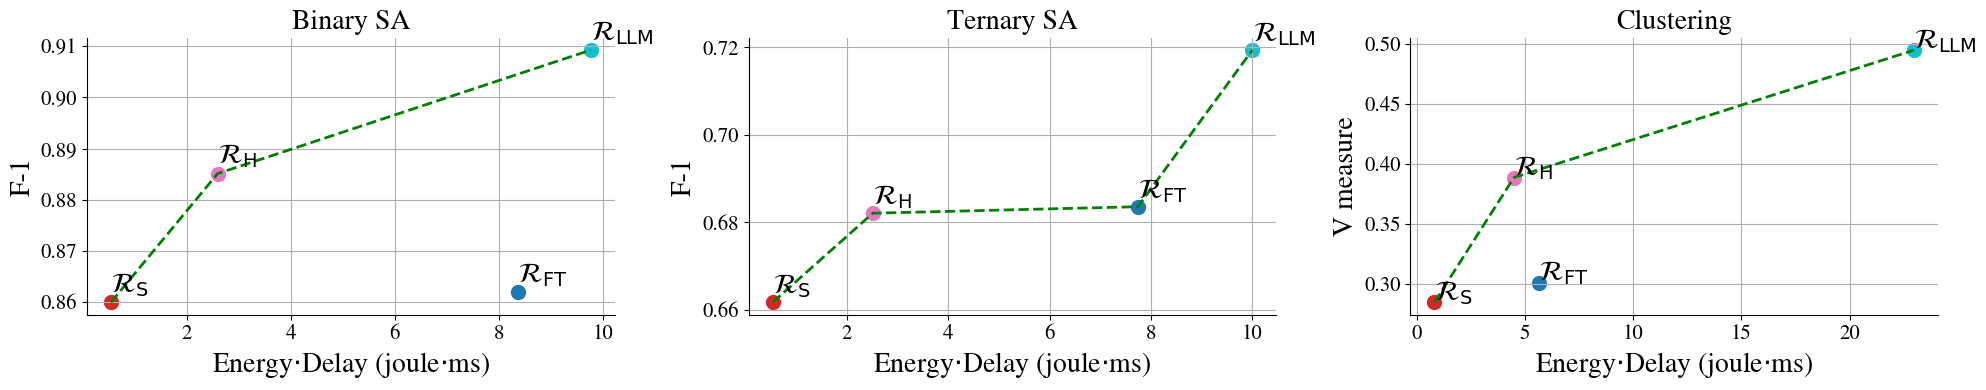

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm


FIGSIZE = (20, 4)          # width, height of the figure
POINT_SIZE = 100           # scatter point size
LABEL_FONT_SIZE = 20       # font size for method labels
TITLE_FONT_SIZE = 20      # subplot title font size
AXIS_FONT_SIZE = 20        # axis labels font size
TICK_FONT_SIZE = 15        # tick label font size
FRONTIER_LINE_WIDTH = 2    # Pareto frontier line width

# Generate distinct colors for each method
n_methods = len(FEATURES)
colors = cm.tab10(np.linspace(0, 1, n_methods))  # use tab20 if >10 methods

# ---------------------------
# Define tasks / data sources
# ---------------------------
tasks = [
    ("Binary SA", lsd, "WeightedF1Test", 2, "F-1"),
    ("Ternary SA", lsd, "WeightedF1Test", 3, "F-1"),
    ("Clustering", lcd, "train_v_measure_score", None, "V measure")
]

# ---------------------------
# Create merged figure
# ---------------------------
fig, axes = plt.subplots(1, 3, figsize=FIGSIZE)

for ax, (title, df, y_col, n_class, ylabel) in zip(axes, tasks):
    x_vals = []
    y_vals = []
    
    for m in FEATURES:
        if n_class is not None:
            x_vals.append(df[(df.FeatureType == m) & (df.N_class == n_class)]["EDP"].median())
            y_vals.append(df[(df.FeatureType == m) & (df.N_class == n_class)][y_col].median())
        else:
            x_vals.append(df[df.FeatureType == m]["EDP"].median())
            y_vals.append(df[df.FeatureType == m][y_col].median())
    
    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)
    
    # --- Compute Pareto frontier ---
    sorted_idx = np.argsort(x_vals)
    x_sorted = x_vals[sorted_idx]
    y_sorted = y_vals[sorted_idx]
    
    pareto_front = []
    max_y = -np.inf
    for xx, yy in zip(x_sorted, y_sorted):
        if yy > max_y:
            pareto_front.append((xx, yy))
            max_y = yy
    pareto_front = np.array(pareto_front)
    
    # --- Plot points with distinct colors ---
    for i, method in enumerate(FEATURES):
        ax.scatter(x_vals[i], y_vals[i], color=colors[i], s=POINT_SIZE)
        ax.text(x_vals[i]+0.01, y_vals[i]+0.002, latex_labels[method], fontsize=LABEL_FONT_SIZE)
    
    # Draw Pareto frontier
    ax.plot(pareto_front[:,0], pareto_front[:,1], 'g--', linewidth=FRONTIER_LINE_WIDTH, label='Pareto frontier')
    
    # Axis labels and title
    ax.set_xlabel(r"Energy$\cdot$Delay (joule$\cdot$ms)", fontsize=AXIS_FONT_SIZE)
    ax.set_ylabel(ylabel, fontsize=AXIS_FONT_SIZE)
    ax.set_title(title, fontsize=TITLE_FONT_SIZE)
    
    # Tick sizes
    ax.tick_params(axis='both', which='major', labelsize=TICK_FONT_SIZE)
    
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
# plt.savefig(os.path.join(SAVE_FOLDER, "pareto_all_laptop.pdf"), format='pdf', bbox_inches='tight')
plt.show()


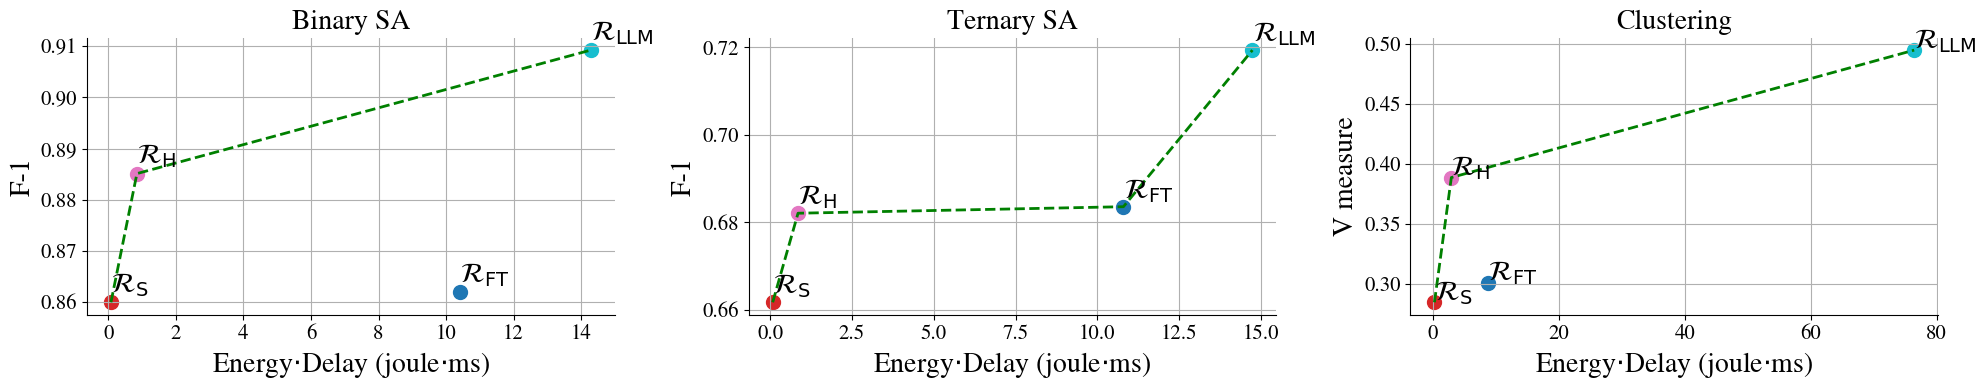

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm


FIGSIZE = (20, 4)          # width, height of the figure
POINT_SIZE = 100           # scatter point size
LABEL_FONT_SIZE = 20       # font size for method labels
TITLE_FONT_SIZE = 20      # subplot title font size
AXIS_FONT_SIZE = 20        # axis labels font size
TICK_FONT_SIZE = 15        # tick label font size
FRONTIER_LINE_WIDTH = 2    # Pareto frontier line width

# Generate distinct colors for each method
n_methods = len(FEATURES)
colors = cm.tab10(np.linspace(0, 1, n_methods))  # use tab20 if >10 methods

# ---------------------------
# Define tasks / data sources
# ---------------------------
tasks = [
    ("Binary SA", jsd, "WeightedF1Test", 2, "F-1"),
    ("Ternary SA",jsd, "WeightedF1Test", 3, "F-1"),
    ("Clustering", jcd, "train_v_measure_score", None, "V measure")
]

# ---------------------------
# Create merged figure
# ---------------------------
fig, axes = plt.subplots(1, 3, figsize=FIGSIZE)

for ax, (title, df, y_col, n_class, ylabel) in zip(axes, tasks):
    x_vals = []
    y_vals = []
    
    for m in FEATURES:
        if n_class is not None:
            x_vals.append(df[(df.FeatureType == m) & (df.N_class == n_class)]["EDP"].median())
            y_vals.append(df[(df.FeatureType == m) & (df.N_class == n_class)][y_col].median())
        else:
            x_vals.append(df[df.FeatureType == m]["EDP"].median())
            y_vals.append(df[df.FeatureType == m][y_col].median())
    
    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)
    
    # --- Compute Pareto frontier ---
    sorted_idx = np.argsort(x_vals)
    x_sorted = x_vals[sorted_idx]
    y_sorted = y_vals[sorted_idx]
    
    pareto_front = []
    max_y = -np.inf
    for xx, yy in zip(x_sorted, y_sorted):
        if yy > max_y:
            pareto_front.append((xx, yy))
            max_y = yy
    pareto_front = np.array(pareto_front)
    
    # --- Plot points with distinct colors ---
    for i, method in enumerate(FEATURES):
        ax.scatter(x_vals[i], y_vals[i], color=colors[i], s=POINT_SIZE)
        ax.text(x_vals[i]+0.01, y_vals[i]+0.002, latex_labels[method], fontsize=LABEL_FONT_SIZE)
    
    # Draw Pareto frontier
    ax.plot(pareto_front[:,0], pareto_front[:,1], 'g--', linewidth=FRONTIER_LINE_WIDTH, label='Pareto frontier')
    
    # Axis labels and title
    ax.set_xlabel(r"Energy$\cdot$Delay (joule$\cdot$ms)", fontsize=AXIS_FONT_SIZE)
    ax.set_ylabel(ylabel, fontsize=AXIS_FONT_SIZE)
    ax.set_title(title, fontsize=TITLE_FONT_SIZE)
    
    # Tick sizes
    ax.tick_params(axis='both', which='major', labelsize=TICK_FONT_SIZE)
    
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
# plt.savefig(os.path.join(SAVE_FOLDER, "pareto_all_jetson.pdf"), format='pdf', bbox_inches='tight')
plt.show()


/tmp/ipykernel_402893/2550260671.py:116: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0.08, 0.05, 1.05, 0.95])  # leave space for device labels


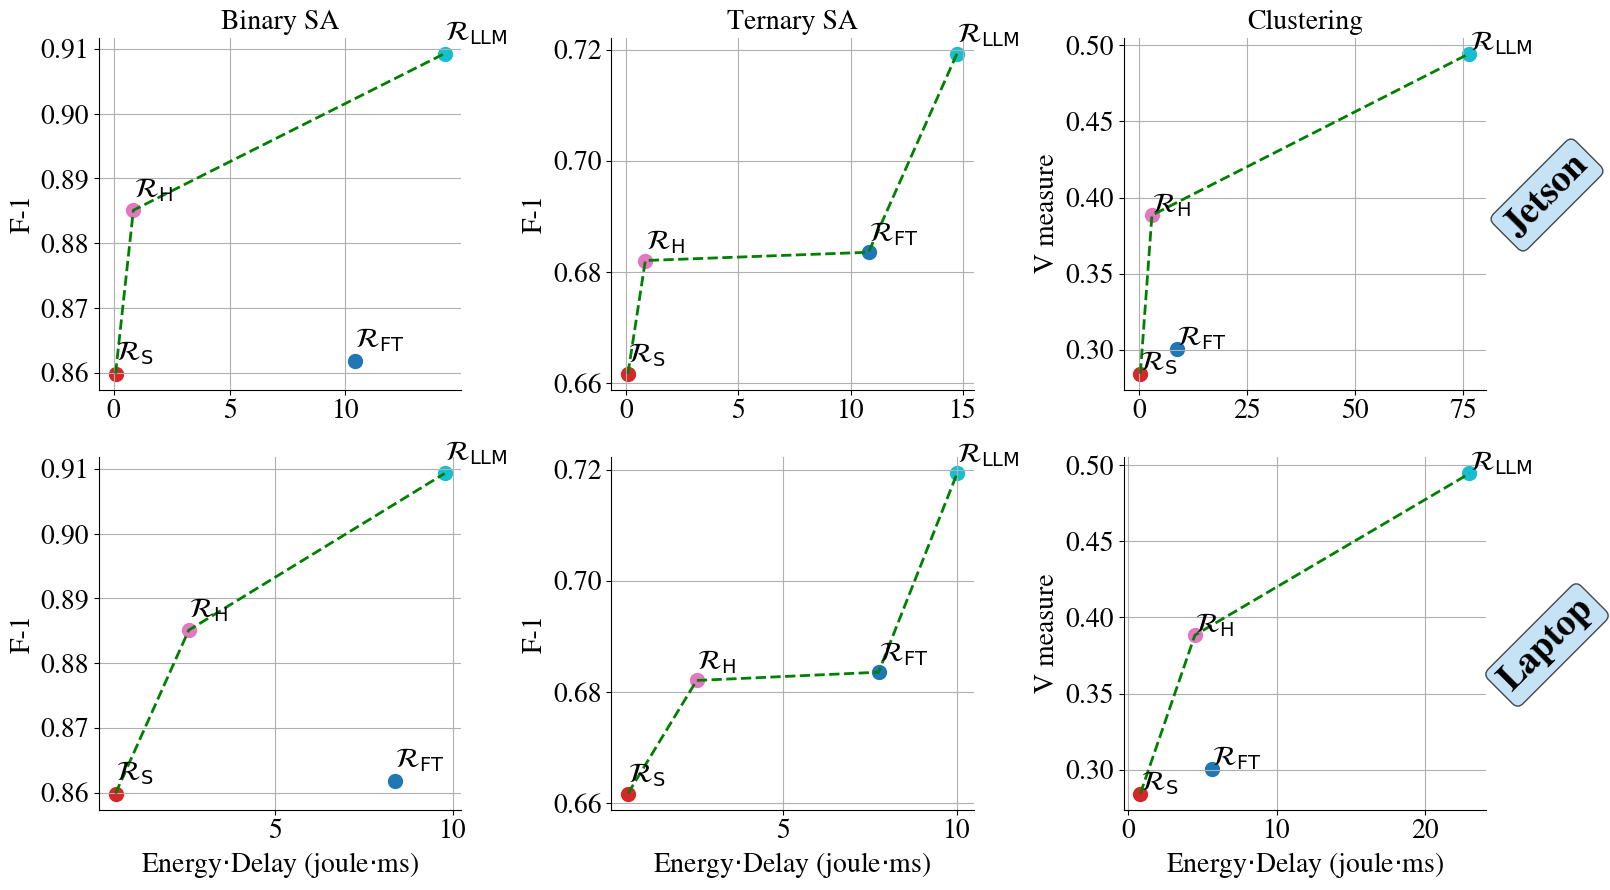

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm

# ---------------------------
# Configurable settings
# ---------------------------
FIGSIZE = (16, 10)          
POINT_SIZE = 100           
LABEL_FONT_SIZE = 20       
TITLE_FONT_SIZE = 20       
AXIS_FONT_SIZE = 20        
TICK_FONT_SIZE = 20        
FRONTIER_LINE_WIDTH = 2    
LABEL_BOX_COLOR = "#AED6F1"  # Light blue rectangle
LABEL_BOX_OPACITY = 0.7

# Colors
n_methods = len(FEATURES)
colors = cm.tab10(np.linspace(0, 1, n_methods))  

EFF = "EDP"

# Devices and tasks
devices = [
    ("Jetson", jsd, jcd),
    ("Laptop", lsd, lcd)
]

tasks_template = [
    ("Binary SA", "WeightedF1Test", 2, "F-1"),
    ("Ternary SA", "WeightedF1Test", 3, "F-1"),
    ("Clustering", "train_v_measure_score", None, "V measure")
]

# ---------------------------
# Create merged figure
# ---------------------------
fig, axes = plt.subplots(2, 3, figsize=FIGSIZE, constrained_layout=True)


for row_idx, (device_name, df_class, df_cluster) in enumerate(devices):
    dfs = [df_class, df_class, df_cluster]
    
    # Add device label with colored rectangle
    fig.text(
        1.05,                    # x-coordinate (fraction)
        0.75 - row_idx*0.45,     # y-coordinate
        device_name,
        fontsize=TITLE_FONT_SIZE+7,
        rotation=45,
        va='center',
        ha='center',
        fontweight='bold',
        bbox=dict(facecolor=LABEL_BOX_COLOR, alpha=LABEL_BOX_OPACITY, edgecolor='black', boxstyle='round,pad=0.2')
    )
    
    for col_idx, (title, y_col, n_class, ylabel) in enumerate(tasks_template):
        ax = axes[row_idx, col_idx]
        df = dfs[col_idx]
        
        x_vals = []
        y_vals = []
        for m in FEATURES:
            if n_class is not None:
                x_vals.append(df[(df.FeatureType == m) & (df.N_class == n_class)][EFF].median())
                y_vals.append(df[(df.FeatureType == m) & (df.N_class == n_class)][y_col].median())
            else:
                x_vals.append(df[df.FeatureType == m][EFF].median())
                y_vals.append(df[df.FeatureType == m][y_col].median())
        
        x_vals = np.array(x_vals)
        y_vals = np.array(y_vals)
        
        # Pareto frontier
        sorted_idx = np.argsort(x_vals)
        x_sorted = x_vals[sorted_idx]
        y_sorted = y_vals[sorted_idx]
        
        pareto_front = []
        max_y = -np.inf
        for xx, yy in zip(x_sorted, y_sorted):
            if yy > max_y:
                pareto_front.append((xx, yy))
                max_y = yy
        pareto_front = np.array(pareto_front)
        
        # Plot points
        for i, method in enumerate(FEATURES):
            ax.scatter(x_vals[i], y_vals[i], color=colors[i], s=POINT_SIZE)
            ax.text(x_vals[i]+0.01, y_vals[i]+0.002, latex_labels[method], fontsize=LABEL_FONT_SIZE)
        
        # Pareto line
        ax.plot(pareto_front[:,0], pareto_front[:,1], 'g--', linewidth=FRONTIER_LINE_WIDTH)
        
        # Title: only for top row
        if row_idx == 0:
            ax.set_title(title, fontsize=TITLE_FONT_SIZE)
        
        # X-axis labels: only for bottom row
        if row_idx == 1:
            ax.set_xlabel(r"Energy$\cdot$Delay (joule$\cdot$ms)", fontsize=AXIS_FONT_SIZE)
        
        # Y-axis label for all
        ax.set_ylabel(ylabel, fontsize=AXIS_FONT_SIZE)
        
        # Tick sizes
        ax.tick_params(axis='both', which='major', labelsize=TICK_FONT_SIZE)
        
        # Remove top/right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(True)

plt.tight_layout(rect=[0.08, 0.05, 1.05, 0.95])  # leave space for device labels
plt.savefig(os.path.join(SAVE_FOLDER, "pareto_jetson_laptop.pdf"), format='pdf', bbox_inches='tight')
plt.show()


## TABLE -- RELATIVE SPEEDUP

In [25]:
import pandas as pd
import numpy as np

# ---------------------------
# Config
# ---------------------------
DEVICES = {
    "Jetson": jsd,
    "Laptop": lsd
}
TASK_CLASS = None
BASELINE = "fasttext"
METRICS = ["time_per_sample", "energy_per_sample", "EDP", "throughput"]

# ---------------------------
# Compute relative metrics per device
# ---------------------------
def compute_relative_metrics(df, baseline=BASELINE, n_class=None):
    relative = {}
    for m in FEATURES:
        mask = df["FeatureType"] == m
        if n_class is not None:
            mask &= df["N_class"] == n_class
        
        median_latency = df.loc[mask, "time_per_sample"].median()
        median_energy  = df.loc[mask, "energy_per_sample"].median()
        median_edp     = df.loc[mask, "EDP"].median()
        median_throughput = df.loc[mask, "throughput"].median()
        
        relative[m] = {
            "latency": median_latency,
            "energy": median_energy,
            "EDP": median_edp,
            "throughput": median_throughput
        }
    
    # Normalize vs baseline
    baseline_vals = relative[baseline]
    for m in FEATURES:
        relative[m]["speedup_latency"] = baseline_vals["latency"] / relative[m]["latency"]
        relative[m]["energy_reduction"] = baseline_vals["energy"] / relative[m]["energy"]
        relative[m]["EDP_reduction"] = baseline_vals["EDP"] / relative[m]["EDP"]
        relative[m]["throughput_gain"] = relative[m]["throughput"] / baseline_vals["throughput"]
    
    return relative

# ---------------------------
# Build merged table with interleaved subcolumns
# ---------------------------
rows = []
metrics_order = [
    ("speedup_latency", "Latency Speedup"),
    ("throughput_gain", "Throughput Gain"),
    ("energy_reduction", "Energy Reduction"),
    ("EDP_reduction", "EDP Reduction"),
]

for method in FEATURES:
    row = {"Method": method}
    # Compute per-device metrics first
    rels = {device_name: compute_relative_metrics(df, baseline=BASELINE, n_class=TASK_CLASS)[method]
            for device_name, df in DEVICES.items()}
    
    # Interleave device values per metric
    for metric_key, metric_label in metrics_order:
        for device_name in DEVICES.keys():
            row[f"{metric_label} ({device_name} ×)"] = rels[device_name][metric_key]
    rows.append(row)

rel_table = pd.DataFrame(rows)
rel_table = rel_table.round(2)
rel_table


,Method,Latency Speedup (Jetson ×),Latency Speedup (Laptop ×),Throughput Gain (Jetson ×),Throughput Gain (Laptop ×),Energy Reduction (Jetson ×),Energy Reduction (Laptop ×),EDP Reduction (Jetson ×),EDP Reduction (Laptop ×)
0,fasttext,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,we,10.42,2.23,10.42,2.23,13.09,5.56,135.85,15.49
2,wefe,3.30,1.31,3.30,1.31,3.81,1.99,12.50,3.24
3,fe,0.82,0.86,0.82,0.86,0.81,0.79,0.73,0.84


In [26]:
import pandas as pd
import numpy as np

# ---------------------------
# Config
# ---------------------------
DEVICES = {
    "Jetson": jcd,
    "Laptop": lcd
}
BASELINE = "fasttext"
METRICS = ["time_per_sample", "energy_per_sample", "EDP", "throughput"]

# ---------------------------
# Compute relative metrics per device
# ---------------------------
def compute_relative_metrics(df, baseline=BASELINE, n_class=None):
    relative = {}
    for m in FEATURES:
        mask = df["FeatureType"] == m
        if n_class is not None:
            mask &= df["N_class"] == n_class
        
        median_latency = df.loc[mask, "time_per_sample"].median()
        median_energy  = df.loc[mask, "energy_per_sample"].median()
        median_edp     = df.loc[mask, "EDP"].median()
        median_throughput = df.loc[mask, "throughput"].median()
        
        relative[m] = {
            "latency": median_latency,
            "energy": median_energy,
            "EDP": median_edp,
            "throughput": median_throughput
        }
    
    # Normalize vs baseline
    baseline_vals = relative[baseline]
    for m in FEATURES:
        relative[m]["speedup_latency"] = baseline_vals["latency"] / relative[m]["latency"]
        relative[m]["energy_reduction"] = baseline_vals["energy"] / relative[m]["energy"]
        relative[m]["EDP_reduction"] = baseline_vals["EDP"] / relative[m]["EDP"]
        relative[m]["throughput_gain"] = relative[m]["throughput"] / baseline_vals["throughput"]
    
    return relative

# ---------------------------
# Build merged table with interleaved subcolumns
# ---------------------------
rows = []
metrics_order = [
    ("speedup_latency", "Latency Speedup"),
    ("throughput_gain", "Throughput Gain"),
    ("energy_reduction", "Energy Reduction"),
    ("EDP_reduction", "EDP Reduction"),
]

for method in FEATURES:
    row = {"Method": method}
    # Compute per-device metrics first
    rels = {device_name: compute_relative_metrics(df, baseline=BASELINE, n_class=None)[method]
            for device_name, df in DEVICES.items()}
    
    # Interleave device values per metric
    for metric_key, metric_label in metrics_order:
        for device_name in DEVICES.keys():
            row[f"{metric_label} ({device_name} ×)"] = rels[device_name][metric_key]
    rows.append(row)

rel_table = pd.DataFrame(rows)
rel_table = rel_table.round(2)
rel_table


,Method,Latency Speedup (Jetson ×),Latency Speedup (Laptop ×),Throughput Gain (Jetson ×),Throughput Gain (Laptop ×),Energy Reduction (Jetson ×),Energy Reduction (Laptop ×),EDP Reduction (Jetson ×),EDP Reduction (Laptop ×)
0,fasttext,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,we,6.15,2.11,6.14,2.11,6.06,3.41,37.95,6.87
2,wefe,1.89,1.17,1.88,1.17,1.58,1.38,2.98,1.25
3,fe,0.45,0.61,0.45,0.61,0.26,0.49,0.11,0.24


# Trying to merge Pareto plots

('Jetson', 'Binary SA', 'fasttext')
('Jetson', 'Binary SA', 'we')
('Jetson', 'Binary SA', 'wefe')
('Jetson', 'Binary SA', 'fe')
('Jetson', 'Ternary SA', 'fasttext')
('Jetson', 'Ternary SA', 'we')
('Jetson', 'Ternary SA', 'wefe')
('Jetson', 'Ternary SA', 'fe')
('Jetson', 'Clustering', 'fasttext')
('Jetson', 'Clustering', 'we')
('Jetson', 'Clustering', 'wefe')


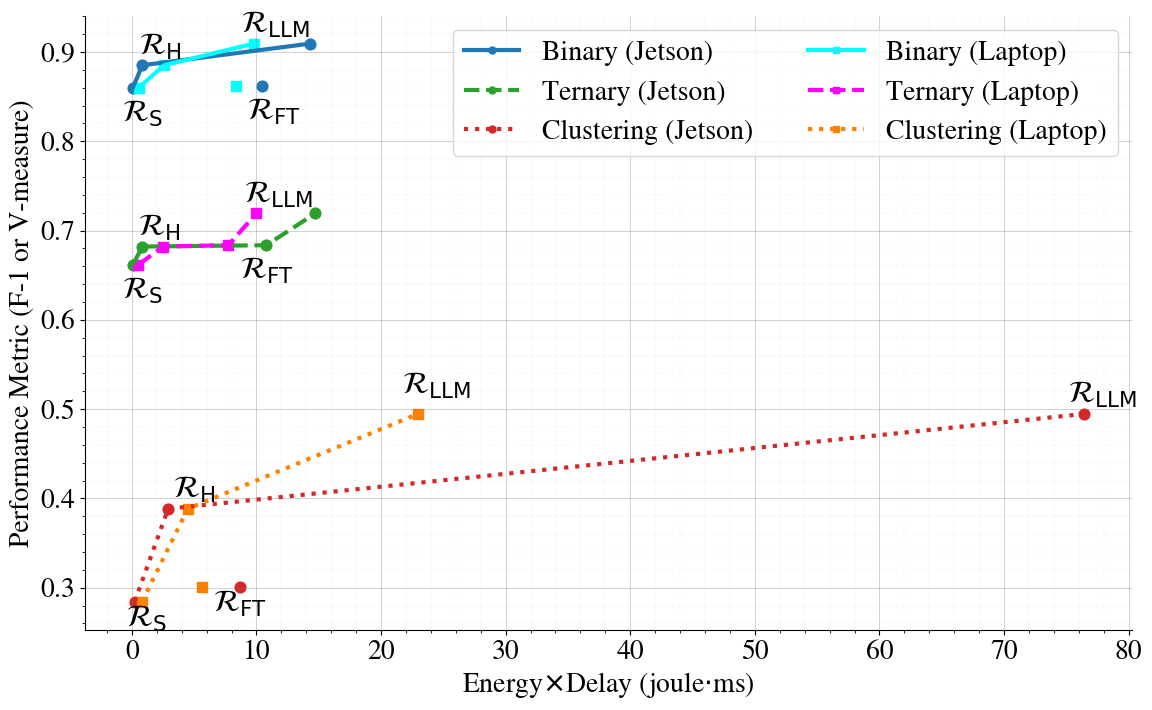

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Configurable settings
# ---------------------------
FIGSIZE = (12, 8)
POINT_SIZE = 60
LABEL_FONT_SIZE = 22
AXIS_FONT_SIZE = 20
TICK_FONT_SIZE = 20
FRONTIER_LINE_WIDTH = 3

# Colors for (device, task) tuples
tuple_colors = {
    ("Jetson", "Binary SA"): (31/255, 119/255, 180/255),    # blue
    ("Jetson", "Ternary SA"): (44/255, 160/255, 44/255),    # green
    ("Jetson", "Clustering"): (214/255, 39/255, 40/255),    # red
    ("Laptop", "Binary SA"): (0, 1, 1),                     # cyan
    ("Laptop", "Ternary SA"): (1, 0, 1),                    # magenta
    ("Laptop", "Clustering"): (1, 0.5, 0)                   # orange
}

# Markers for devices
device_markers = {
    "Jetson": "o",    # circle
    "Laptop": "s"     # square
}

# Line styles for tasks
task_linestyles = {
    "Binary SA": "solid",
    "Ternary SA": "dashed",
    "Clustering": "dotted"
}

EFF = "EDP"

# Devices and tasks
devices = [
    ("Jetson", jsd, jcd),
    ("Laptop", lsd, lcd)
]

tasks_template = [
    ("Binary SA", "WeightedF1Test", 2, "F-1"),
    ("Ternary SA", "WeightedF1Test", 3, "F-1"),
    ("Clustering", "train_v_measure_score", None, "V measure")
]

# ---------------------------
# Fine-grained label control
# ---------------------------
# Each key: (device, task, method)
# Each value: {"visible": True/False, "dx": float, "dy": float}
label_config = {
    (device, task, method): {"visible": True, "dx": 0.01, "dy": 0.002}
    for device, _df_class, _df_cluster in devices
    for task, _y_col, _n_class, _ylabel in tasks_template
    for method in FEATURES
}

# Disable all Jetson-related labels
for key in label_config:
    device, task, method = key
    if device == "Jetson" and key != ('Jetson', 'Clustering', 'fe'):
        label_config[key]["visible"] = False
        print(key)

# Move all remaining labels (Laptop) down
for key in label_config:
    device, task, method = key
    if device == "Laptop" and label_config[key]["visible"]:
        label_config[key]["dy"] -= 0.01  # decrease dy to move label down

label_config[('Jetson', 'Clustering', 'fe')]["dy"] += 0.01
label_config[('Jetson', 'Clustering', 'fe')]["dx"] -= 1.3



## ADJUST CLUSTERING
label_config[('Laptop', 'Clustering', 'fe')]["dy"] += 0.03
label_config[('Laptop', 'Clustering', 'fe')]["dx"] -= 1.3

label_config[('Laptop', 'Clustering', 'wefe')]["dy"] += 0.02
label_config[('Laptop', 'Clustering', 'wefe')]["dx"] -= 1.2

label_config[('Laptop', 'Clustering', 'we')]["dy"] -= 0.02
label_config[('Laptop', 'Clustering', 'we')]["dx"] -= 1.3

label_config[('Laptop', 'Clustering', 'fasttext')]["dy"] -= 0.02
label_config[('Laptop', 'Clustering', 'fasttext')]["dx"] += 0.9



## ADJUST TERNARY CLASSIFICATION
label_config[('Laptop', 'Ternary SA', 'fe')]["dy"] += 0.02
label_config[('Laptop', 'Ternary SA', 'fe')]["dx"] -= 1.

label_config[('Laptop', 'Ternary SA', 'wefe')]["dy"] += 0.02
label_config[('Laptop', 'Ternary SA', 'wefe')]["dx"] = -2

label_config[('Laptop', 'Ternary SA', 'we')]["dy"] -= 0.03
label_config[('Laptop', 'Ternary SA', 'we')]["dx"] -= 1.3

label_config[('Laptop', 'Ternary SA', 'fasttext')]["dy"] -= 0.03
label_config[('Laptop', 'Ternary SA', 'fasttext')]["dx"] += 0.9



## ADJUST BINARY CLASSIFICATION
label_config[('Laptop', 'Binary SA', 'fe')]["dy"] += 0.02
label_config[('Laptop', 'Binary SA', 'fe')]["dx"] -= 1.

label_config[('Laptop', 'Binary SA', 'wefe')]["dy"] += 0.02
label_config[('Laptop', 'Binary SA', 'wefe')]["dx"] = -2

label_config[('Laptop', 'Binary SA', 'we')]["dy"] -= 0.03
label_config[('Laptop', 'Binary SA', 'we')]["dx"] -= 1.3

label_config[('Laptop', 'Binary SA', 'fasttext')]["dy"] -= 0.03
label_config[('Laptop', 'Binary SA', 'fasttext')]["dx"] += 0.9




# Example: tweak specific labels
# label_config[("Jetson", "Binary SA", "MethodA")]["visible"] = False
# label_config[("Laptop", "Clustering", "MethodB")]["dx"] = 0.03
# label_config[("Laptop", "Clustering", "MethodB")]["dy"] = 0.01

# ---------------------------
# Plotting
# ---------------------------
plt.figure(figsize=FIGSIZE)

for device_name, df_class, df_cluster in devices:
    dfs = [df_class, df_class, df_cluster]

    for (title, y_col, n_class, ylabel), df in zip(tasks_template, dfs):
        x_vals = []
        y_vals = []
        for m in FEATURES:
            if n_class is not None:
                x_vals.append(df[(df.FeatureType == m) & (df.N_class == n_class)][EFF].median())
                y_vals.append(df[(df.FeatureType == m) & (df.N_class == n_class)][y_col].median())
            else:
                x_vals.append(df[df.FeatureType == m][EFF].median())
                y_vals.append(df[df.FeatureType == m][y_col].median())

        x_vals = np.array(x_vals)
        y_vals = np.array(y_vals)

        # Pareto frontier
        sorted_idx = np.argsort(x_vals)
        x_sorted = x_vals[sorted_idx]
        y_sorted = y_vals[sorted_idx]

        pareto_front = []
        max_y = -np.inf
        for xx, yy in zip(x_sorted, y_sorted):
            if yy > max_y:
                pareto_front.append((xx, yy))
                max_y = yy
        pareto_front = np.array(pareto_front)

        # Plot points and labels
        for i, method in enumerate(FEATURES):
            plt.scatter(
                x_vals[i], y_vals[i],
                color=tuple_colors[(device_name, title)],
                marker=device_markers[device_name],
                s=POINT_SIZE
            )

            cfg = label_config[(device_name, title, method)]
            if cfg["visible"]:
                plt.text(
                    x_vals[i] + cfg["dx"],
                    y_vals[i] + cfg["dy"],
                    latex_labels[method],
                    fontsize=LABEL_FONT_SIZE
                )

        # Pareto line
        plt.plot(
            pareto_front[:,0], pareto_front[:,1],
            color=tuple_colors[(device_name, title)],
            linestyle=task_linestyles[title],
            linewidth=FRONTIER_LINE_WIDTH,
            label=f"{title} ({device_name})"
        )

ax = plt.gca()

# Turn on minor ticks for finer grid
ax.minorticks_on()

# Major grid: subtle but visible
ax.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.5)

# Minor grid: very light and small squares
ax.grid(which='minor', linestyle=':', linewidth=0.3, color='gray', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel(r"Energy$\times$Delay (joule$\cdot$ms)", fontsize=AXIS_FONT_SIZE)
plt.ylabel("Performance Metric (F-1 or V-measure)", fontsize=AXIS_FONT_SIZE)
plt.tick_params(axis='both', labelsize=TICK_FONT_SIZE)
plt.grid(True)
from matplotlib.lines import Line2D

# Example: legend showing line + marker
legend_handles = []

for device, marker in device_markers.items():
    for task, linestyle in task_linestyles.items():
        # pick color for this (device, task) tuple
        color = tuple_colors[(device, task)]
        legend_handles.append(
            Line2D([0], [0],
                   color=color,
                   marker=marker,
                   markersize=5,
                   lw=3,
                   linestyle=linestyle,
                   label=f"{task.replace(" SA", "")} ({device})")
        )

# Add combined legend
plt.legend(handles=legend_handles, fontsize=AXIS_FONT_SIZE, ncol=2)
# plt.title("Pareto Frontiers: Tasks × Devices", fontsize=AXIS_FONT_SIZE+2)
plt.tight_layout(rect=[0.08, 0.05, 1.05, 0.95])  # leave space for device labels
plt.savefig(os.path.join(SAVE_FOLDER, "pareto_all.pdf"), format='pdf', bbox_inches='tight')
plt.show()

# UPDATING BOXPLOTS

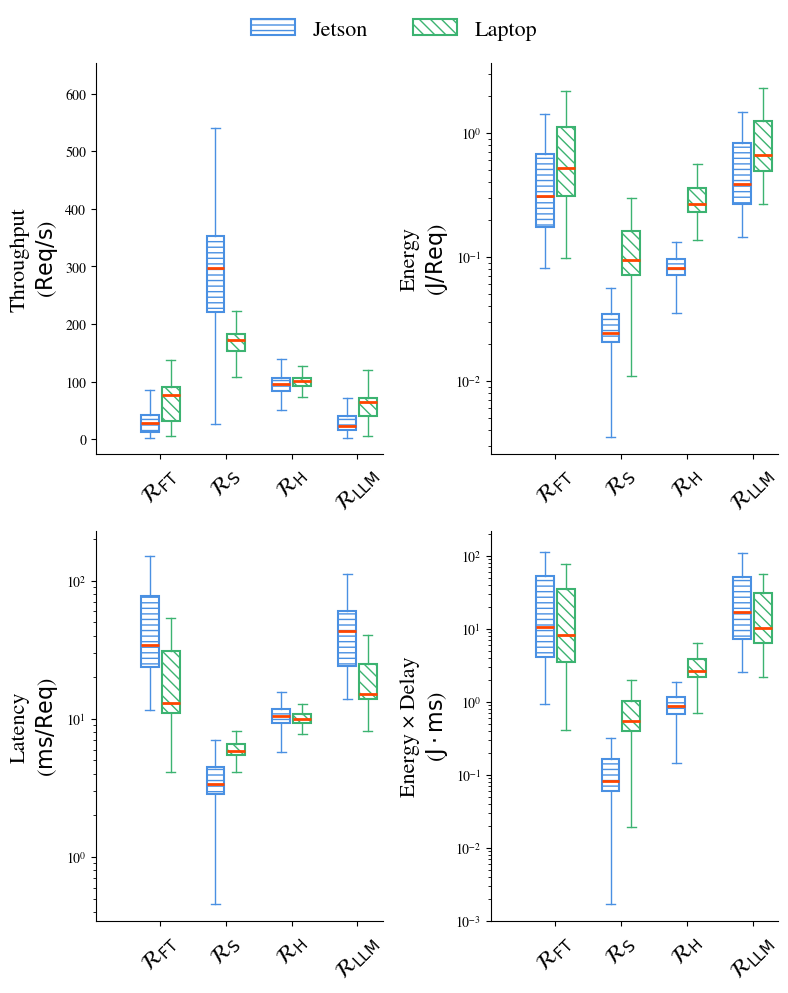

In [103]:
import matplotlib.pyplot as plt
from collections import defaultdict
import os

FONTSIZE = 16
BOX_WIDTH = 0.3
median_color = '#FF4500'

metrics = [
    ("throughput", "Throughput\n($\\mathrm{Req}/\\mathrm{s}$)", False),
    ("energy_per_sample", "Energy\n($\\mathrm{J}/\\mathrm{Req}$)", True),
    ("time_per_sample", "Latency\n($\\mathrm{ms}/\\mathrm{Req}$)", True),
    ("EDP", "Energy × Delay\n($\\mathrm{J}\\cdot\\mathrm{ms}$)", True)
]

device_labels = ["Jetson", "Laptop"]
device_sources = [[jsd, jcd], [lsd, lcd]]
device_colors = ['#4A90E2', '#3CB371']   # Jetson blue, Laptop green
device_hatches = ['---', '\\\\\\']           # hatch styles

fig, axes = plt.subplots(2, 2, figsize=(8, 10))
axes = axes.flatten()
fig.subplots_adjust(wspace=0.3, hspace=0.4)


def plot_metric(ax, metric_key, ylabel, logscale):
    positions = []
    labels = []
    data_groups = []
    # integer tick for each feature group
    group_centers = list(range(len(FEATURES)))
    offset = 0.2   # horizontal shift left/right for Jetson vs Laptop

    startpos = 0
    group_gap = 0.4   # gap between feature groups
    intra_gap = 0.05   # spacing between Jetson & Laptop

    for feat in FEATURES:
        for d_idx, sources in enumerate(device_sources):
            arr = []
            for source in sources:
                dt = source[source["FeatureType"] == feat][metric_key]
                arr.extend(dt)
            data_groups.append((d_idx, arr))

            pos = startpos + (d_idx * (BOX_WIDTH + intra_gap))
            positions.append(pos)
            labels.append(latex_labels[feat] if d_idx == 0 else "")

        startpos += 2 * (BOX_WIDTH + intra_gap) + group_gap

    # Plot
    for (d_idx, arr), pos in zip(data_groups, positions):
        box = ax.boxplot(
            arr,
            positions=[pos],
            widths=BOX_WIDTH,
            patch_artist=True,
            showfliers=False
        )
        color = device_colors[d_idx]
        hatch = device_hatches[d_idx]
        for patch in box['boxes']:
            patch.set(facecolor='none', hatch=hatch, edgecolor=color, linewidth=1.5)
        for whisker in box['whiskers']:
            whisker.set(color=color, linewidth=1)
        for cap in box['caps']:
            cap.set(color=color, linewidth=1)
        for median in box['medians']:
            median.set(color=median_color, linewidth=2, zorder=5)

    if logscale:
        ax.set_yscale('log')

    ax.set_ylabel(ylabel, fontsize=FONTSIZE)
    ax.set_xticks([positions[i] + (positions[i+1]-positions[i])/2 for i in range(0, len(positions), 2)])
    ax.set_xticklabels([latex_labels[f] for f in FEATURES], fontsize=FONTSIZE, rotation=45)

    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax * 1.15)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # 🚩 compact horizontally
    margin = 0.9   # small margin around groups
    ax.set_xlim(group_centers[0] - margin, group_centers[-1]+margin)


# Plot each metric into its subplot
for ax, (metric_key, ylabel, logscale) in zip(axes, metrics):
    plot_metric(ax, metric_key, ylabel, logscale)
    # ax.set_title(ylabel, fontsize=FONTSIZE, pad=15)

# Legend (devices)
from matplotlib.patches import Patch
legend_handles = [Patch(facecolor='none', edgecolor=color, hatch=h, label=lab, linewidth=1.5)
                  for color, h, lab in zip(device_colors, device_hatches, device_labels)]
fig.legend(handles=legend_handles, loc="upper center", ncol=2, fontsize=FONTSIZE, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.savefig(SAVE_FOLDER + os.sep + "efficiency_boxplots_v2.pdf",
            format='pdf', bbox_inches='tight')
plt.show()


# TABLE DATA

#### Throughput - jetson

In [110]:
METHOD = "time_per_sample"
FEAT = "fasttext"
# Combine the two lists
tt = list(jsd[jsd.FeatureType == FEAT][METHOD]) + list(jcd[jcd.FeatureType == FEAT][METHOD])

# Convert to numpy array for convenience
tt_array = np.array(tt)

# Compute statistics
min_val = np.min(tt_array)
q1 = np.percentile(tt_array, 25)
median = np.median(tt_array)
q3 = np.percentile(tt_array, 75)
max_val = np.max(tt_array)

print(f"{min_val:.3f} & {q1:.2f} & {median:.2f} & {q3:.2f} & {max_val:.2f}")
print(f"Min: {min_val}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Max: {max_val}")

11.549 & 23.64 & 34.21 & 76.98 & 614.93
Min: 11.5490285555521
Q1: 23.639882107575673
Median: 34.20594274997705
Q3: 76.98172271251678
Max: 614.9318729128156


In [111]:
METHOD = "time_per_sample"
FEAT = "fasttext"
# Combine the two lists
tt = list(lsd[lsd.FeatureType == FEAT][METHOD]) + list(lcd[lcd.FeatureType == FEAT][METHOD])

# Convert to numpy array for convenience
tt_array = np.array(tt)

# Compute statistics
min_val = np.min(tt_array)
q1 = np.percentile(tt_array, 25)
median = np.median(tt_array)
q3 = np.percentile(tt_array, 75)
max_val = np.max(tt_array)

print(f"{min_val:.2f} & {q1:.2f} & {median:.2f} & {q3:.2f} & {max_val:.2f}")
print(f"Min: {min_val}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Max: {max_val}")

4.15 & 11.05 & 13.10 & 30.84 & 199.98
Min: 4.1483069920019
Q1: 11.054600826138099
Median: 13.09770554724075
Q3: 30.8448853443651
Max: 199.9783354385726
